# Exploratory Data Analysis
In this section we will perform exploratory data analysis with the goal of understanding the data and identifying any patterns that may be useful for our machine learning models.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Cleaned Data

In [3]:
# Read in Parquet File
df_final = pd.read_parquet('02_Clean_Data/df_final.parquet')

## Filter Out and Analyze the Data Relevant to the Options on the Day of the Observation

In [5]:
# Select the Columns About the Options Data
options = df_final[['ID', 'Date', 'Ticker', 'Call', 'Close', 'Stock Ticker',
                    'Days to Expiration', 'strike', 'impliedVolatility',
                    'Price-0']]
# Convert Call from Binary to Categorical
options['Call'] = options['Call'].astype(str)
def convert_call(x):
    if x == '1':
        return 'Call'
    else:
        return 'Put'
options['Call'] = options['Call'].apply(convert_call)
# Rename 'Call' Column to 'Option Type'
options.rename(columns={'Call': 'Option Type'}, inplace=True)
options.head()

,ID,Date,Ticker,Option Type,Close,Stock Ticker,Days to Expiration,strike,impliedVolatility,Price-0
0,AAPL-2022-08-25,2022-08-25,AAPL230421C00050000,Call,119.500000,AAPL,239,50.0,4.187505,169.489624
1,AAPL-2022-08-26,2022-08-26,AAPL230421C00050000,Call,117.349998,AAPL,238,50.0,4.187505,163.100006
2,AAPL-2022-08-29,2022-08-29,AAPL230421C00050000,Call,112.599998,AAPL,235,50.0,4.187505,160.867111
3,AAPL-2022-09-01,2022-09-01,AAPL230421C00050000,Call,107.599998,AAPL,232,50.0,4.187505,157.457993
4,AAPL-2022-09-02,2022-09-02,AAPL230421C00050000,Call,106.250000,AAPL,231,50.0,4.187505,155.314819


In [6]:
# List Total Number of Option-Date Combinations
print('Total Number of Option-Date Combinations: {}'.format(len(df_final)))

Total Number of Option-Date Combinations: 375342


In [7]:
# Get the Number of Unique Underlying Stocks
print('Number of Unique Underyling Stocks: {}'.format(
    options['Stock Ticker'].nunique()))

Number of Unique Underyling Stocks: 310


In [8]:
# Get the Number of Unique Options
print('Number of Unique Option Options: {}'.format(
    df_final['Ticker'].nunique()))

Number of Unique Option Options: 15799


In [9]:
# Get the Summary Statistics of the Options Data
# Rounding to 2 decimal places
options.describe().round(2)

,Close,Days to Expiration,strike,impliedVolatility,Price-0
count,375342.00,375342.00,375342.00,375342.00,375342.00
mean,6.55,82.00,154.63,0.66,155.07
std,12.72,63.93,140.47,0.57,138.93
min,0.01,3.00,0.50,0.00,4.86
25%,0.59,29.00,55.00,0.34,55.62
50%,2.35,59.00,110.00,0.51,113.40
75%,7.15,130.00,200.00,0.76,203.62
max,480.65,325.00,1120.00,25.36,765.19


In [10]:
# Calculate the Correlation Matrix
corr = options.corr()
corr

,Close,Days to Expiration,strike,impliedVolatility,Price-0
Close,1.000000,0.161321,0.337325,0.101884,0.352546
Days to Expiration,0.161321,1.000000,-0.019545,0.175312,-0.047340
strike,0.337325,-0.019545,1.000000,-0.172493,0.963250
impliedVolatility,0.101884,0.175312,-0.172493,1.000000,-0.121617
Price-0,0.352546,-0.047340,0.963250,-0.121617,1.000000


## Filter Out the Historical Underlying Prices Data

In [11]:
prices = df_final.filter(regex='Price-')
prices.head()

,Price-0,Price-4,Price-5,Price-6,Price-7,Price-10,Price-11,Price-12,Price-13,Price-14,Price-17,Price-18,Price-19,Price-20,Price-21,Price-24,Price-25,Price-26,Price-27,Price-28
0,169.489624,170.974884,170.974884,170.974884,173.596527,172.639587,171.553055,171.553055,171.553055,167.954529,164.346024,164.824509,164.824509,164.824509,165.053772,160.773376,161.768829,161.768829,161.768829,156.632355
1,163.100006,167.037445,170.974884,170.974884,170.974884,172.480103,172.639587,171.553055,171.553055,171.553055,164.395874,164.346024,164.824509,164.824509,164.824509,159.280212,160.773376,161.768829,161.768829,161.768829
2,160.867111,169.489624,166.997574,166.698517,167.037445,170.974884,173.596527,173.995270,172.480103,172.639587,171.553055,167.954529,168.702148,164.395874,164.346024,164.824509,165.053772,165.372330,159.280212,160.773376
3,157.457993,163.100006,163.100006,163.100006,169.489624,167.037445,170.974884,170.974884,170.974884,173.596527,172.639587,171.553055,171.553055,171.553055,167.954529,164.346024,164.824509,164.824509,164.824509,165.053772
4,155.314819,160.867111,163.100006,163.100006,163.100006,166.698517,167.037445,170.974884,170.974884,170.974884,172.480103,172.639587,171.553055,171.553055,171.553055,164.395874,164.346024,164.824509,164.824509,164.824509


## Filter Out the Historical Risk Free Rate Data

In [12]:
rates = df_final.filter(regex='rate-')
rates.head()

,rate-0,rate-4,rate-5,rate-6,rate-7,rate-10,rate-11,rate-12,rate-13,rate-14,rate-17,rate-18,rate-19,rate-20,rate-21,rate-24,rate-25,rate-26,rate-27,rate-28
0,3.026,3.026,3.026,3.026,3.026,3.026,3.026,3.026,3.026,3.026,3.026,3.026,3.026,3.026,3.026,3.026,3.026,3.026,3.026,3.026
1,3.035,3.035,3.035,3.035,3.035,3.035,3.035,3.035,3.035,3.035,3.035,3.035,3.035,3.035,3.035,3.035,3.035,3.035,3.035,3.035
2,3.110,3.110,3.110,3.110,3.110,3.110,3.110,3.110,3.110,3.110,3.110,3.110,3.110,3.110,3.110,3.110,3.110,3.110,3.110,3.110
3,3.265,3.265,3.265,3.265,3.265,3.265,3.265,3.265,3.265,3.265,3.265,3.265,3.265,3.265,3.265,3.265,3.265,3.265,3.265,3.265
4,3.193,3.193,3.193,3.193,3.193,3.193,3.193,3.193,3.193,3.193,3.193,3.193,3.193,3.193,3.193,3.193,3.193,3.193,3.193,3.193


## Filter Out the Historical Dividend Yields Data

In [13]:
dividends = df_final.filter(regex='Dividends-')
dividends.head()

,Dividends-4,Dividends-5,Dividends-6,Dividends-7,Dividends-10,Dividends-11,Dividends-12,Dividends-13,Dividends-14,Dividends-17,Dividends-18,Dividends-19,Dividends-20,Dividends-21,Dividends-24,Dividends-25,Dividends-26,Dividends-27,Dividends-28
0,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23
1,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23
2,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23
3,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23
4,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23


# Plot the Distribution of the Option Prices

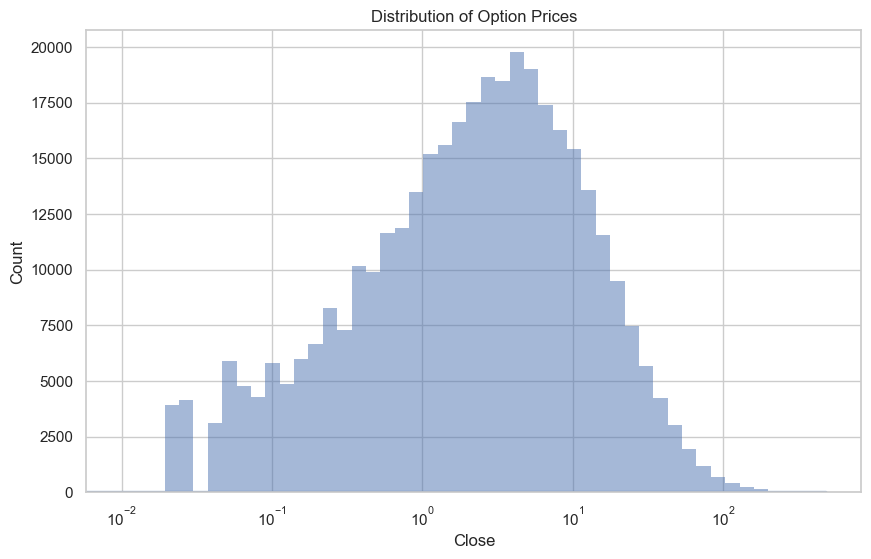

In [ ]:
# Plot the Distribution of the Option Prices using Seaborn
plt.figure(figsize=(10, 6))

# Determine the number of bins for log-scale
bin_edges = np.logspace(np.log10(options['Close'].min()), np.log10(options['Close'].max()), num=50)

# Plot histogram with log-scale bins
sns.histplot(options['Close'], color='#4C72B0', bins=bin_edges, kde=False, alpha=0.5)

# Plot KDE on top of histogram
sns.kdeplot(options['Close'], color='#4C72B0', lw=2)

# Set log-scale for x-axis
plt.xscale('log')

plt.title('Distribution of Option Prices')
plt.show()

## Create a Barchart of the Number of Options for Each Stock

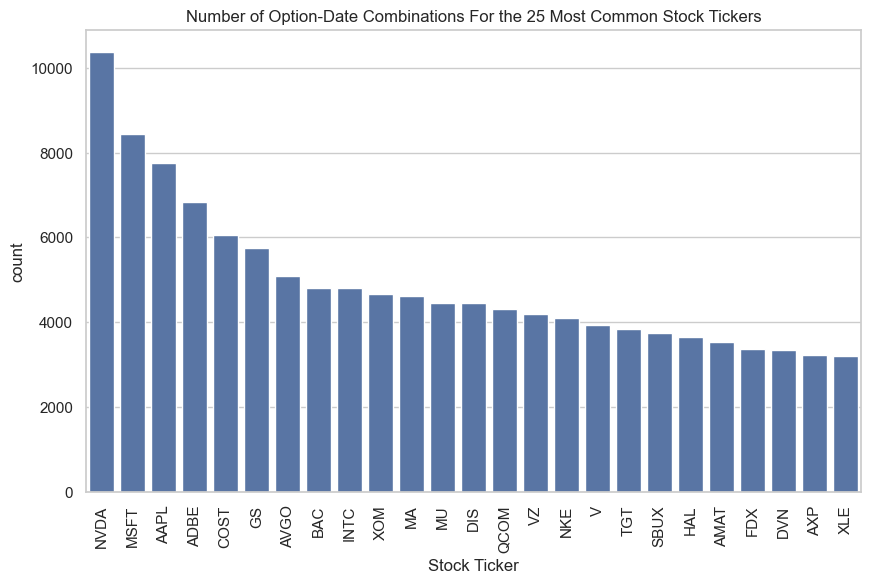

In [14]:
# Create a Bar Chart of the Number of Options Ticker using Seaborn
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
top_tickers = pd.DataFrame(options['Stock Ticker'].value_counts()).head(25)
# Filter the Options Dataframe to Only Include the Top 25 Tickers
options_25 = options[options['Stock Ticker'].isin(top_tickers.index)]
order = options_25['Stock Ticker'].value_counts().index
sns.countplot(x='Stock Ticker', data=options_25, order=order, color='#4C72B0')
plt.title('Number of Option-Date Combinations For the 25 Most Common Stock Tickers')
plt.xticks(rotation=90)
plt.show()

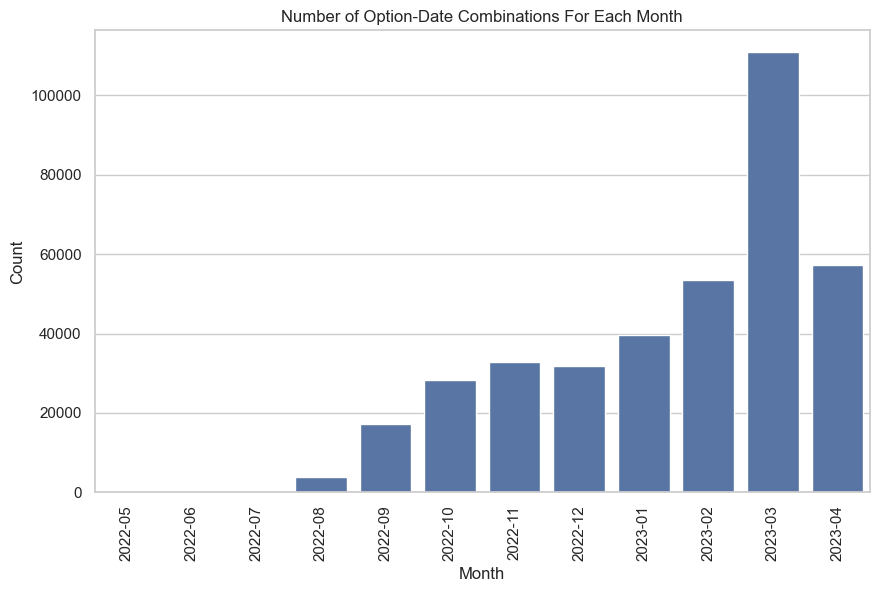

In [15]:
# Create a Copy of the Options Dataframe
options_date = options.copy()

# Convert 'Date' column to datetime
options_date['Date'] = pd.to_datetime(options_date['Date'])

# Group dates by month
options_date['Month'] = options_date['Date'].dt.to_period('M')

# Create a Bar Chart
plt.figure(figsize=(10, 6))
sns.countplot(x=options_date['Month'], color='#4C72B0', order=sorted(options_date['Month'].unique()))
plt.title('Number of Option-Date Combinations For Each Month')
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

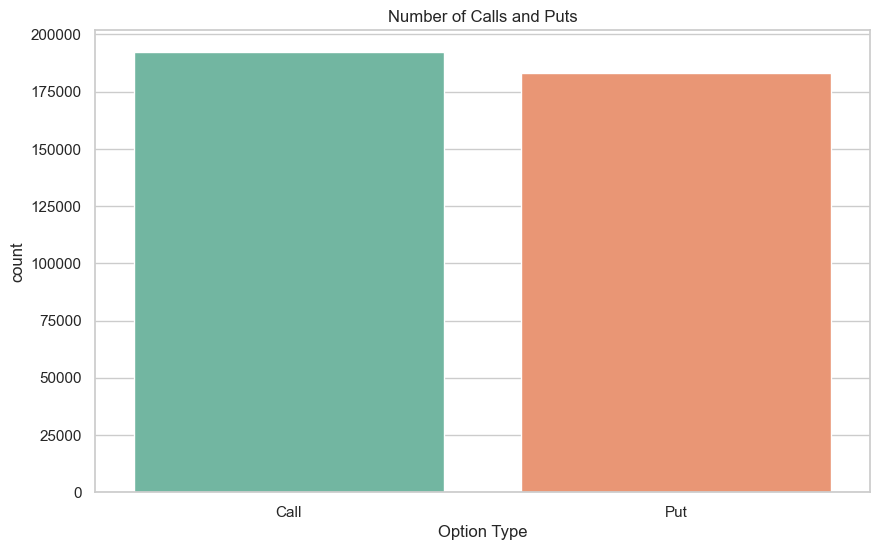

In [16]:
# Create a Bar Chart for how many Calls and Puts there are
# for each Date using Seaborn (Sort X-Axis by Date)
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.countplot(x='Option Type', data=options, palette='Set2')
plt.title('Number of Calls and Puts')
plt.show()

## Plot the Distribution of Number of Days to Expiration

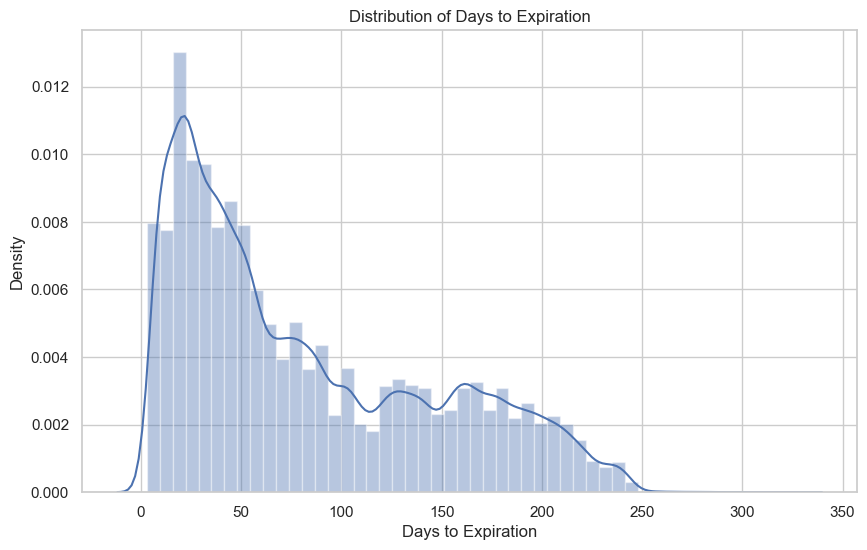

In [17]:
# Plot the Distribution of the Days to Expiration
plt.figure(figsize=(10, 6))
sns.distplot(options['Days to Expiration'], color='#4C72B0')
plt.title('Distribution of Days to Expiration')
plt.show()

## Plot the Distribution of Strike Prices

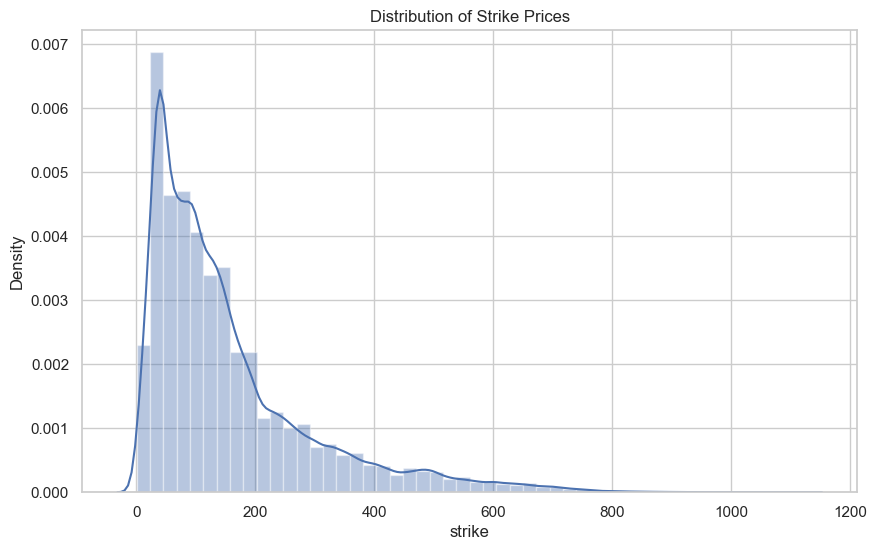

In [18]:
# Plot the Distribution of the Strike Prices using Seaborn
plt.figure(figsize=(10, 6))
sns.distplot(options['strike'], color='#4C72B0')
plt.title('Distribution of Strike Prices')
plt.show()

## Plot the Distributions of the Underlying Prices

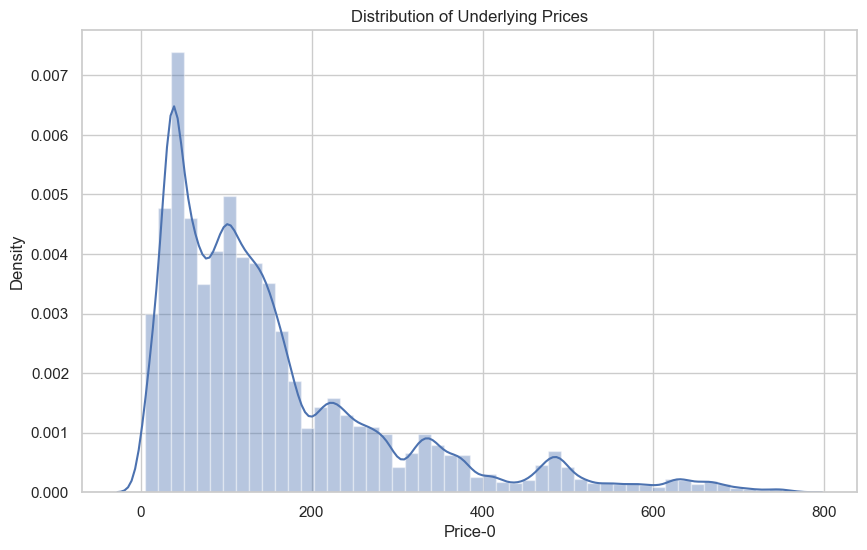

In [19]:
# Plot the Distribution of the Underlying Prices using Seaborn
plt.figure(figsize=(10, 6))
sns.distplot(options['Price-0'], color='#4C72B0')
plt.title('Distribution of Underlying Prices')
plt.show()

## Create a Pairplot for the Options Data

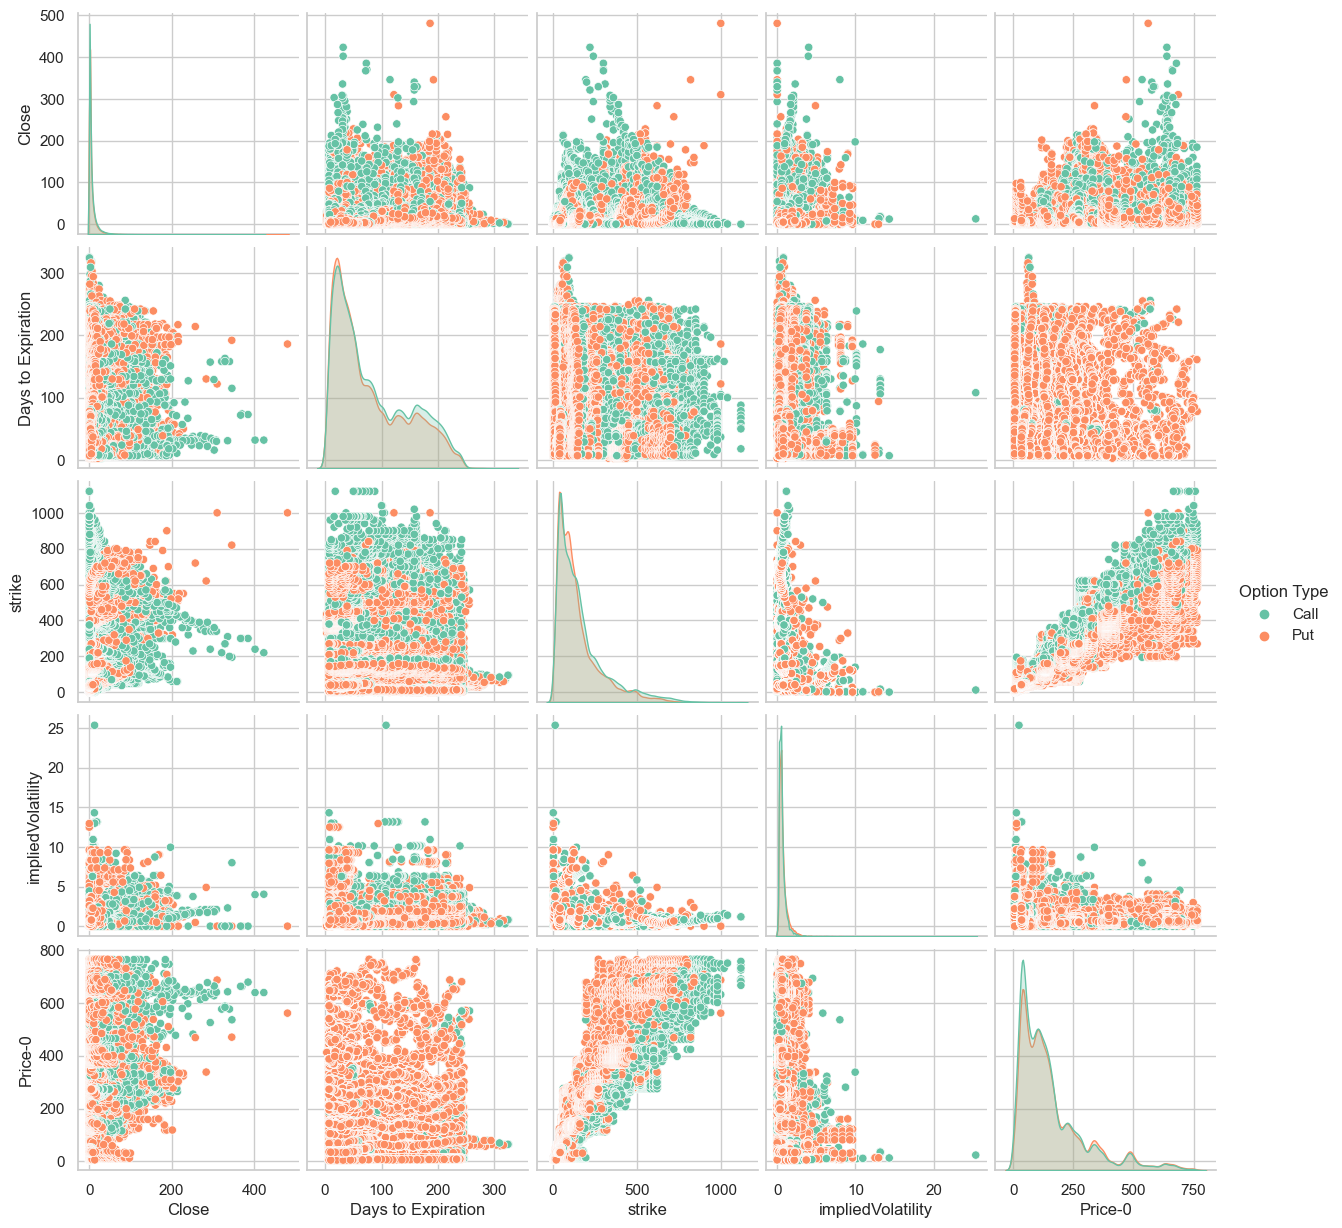

In [22]:
# Create a Pairplot of the Options Data
sns.pairplot(options, hue='Option Type', palette='Set2')
plt.show()